[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Example 3.28 and Figure 3.19

Model to predict the interarrival times between calls arriving at a call center\
Topics: Exponential distribution, maximum likelihood estimation, kernel density estimation, parametric and nonparametric estimation

Author: Carlos Fernandez-Granda\
Data source: https://iew.technion.ac.il/serveng/callcenterdata/

In [21]:
# Data is available here: http://iew3.technion.ac.il/serveng/callcenterdata/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from scipy.stats import expon

year = 1999

font_size = 20
font_size_legend = 20
font_size_ticks = 15

# Load data
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
date = {}
time = {}
month_number = {}
for number, month in enumerate(months):
    data = pd.read_csv ("../data/call_center/" + month + ".txt",sep='\s+')
    date[month] = data["date"]  
    time[month] = data["vru_entry"]
    month_number[month] = number + 1
print(date["January"][3])
print(time["January"][10:15])
hour = time["January"][0].split(":")[0]
print(hour)
hour = time["January"][14].split(":")[0]
print(hour)
print(month_number["March"])

990101
10     9:16:49
11     9:27:03
12     9:41:14
13     9:47:49
14    10:04:47
Name: vru_entry, dtype: object
0
10
3


In [22]:
days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31]
# Auxiliary function, outputs the number of calls for each day in a month between time_ini and time_end
def extract_call_times(time_ini,time_end,month,verbose):
    call_times = []
    for ind in range(days_in_month[month_number[month]-1]):
        call_times.append([])
    if verbose:
        print("Month: " + month)
    for index, time_call in enumerate(time[month]):
        if verbose:
            print("Date: " + str(date[month][index]) + " Time: " + time_call)
        day = int(date[month][index]) % 100
        hour = int(time_call.split(":")[0])
        if verbose:
            print("Date: " + str(date[month][index]) + " Time: " + time_call + " Day: " + str(day) + " Hour: " + str(hour) )
        if time_ini <= hour and hour < time_end:
            time_in_seconds = hour * 3600 + int(time_call.split(":")[1])*60 + int(time_call.split(":")[2])
            if verbose:
                print("Time in seconds: " + str(time_in_seconds))
            call_times[day-1].append(time_in_seconds)
    return call_times
verbose = False
call_times = extract_call_times(9,10,"October",verbose)
# print(call_times)
for calls_day in call_times:
    print(len(calls_day))

90
2
146
139
145
110
146
89
1
165
126
132
129
98
81
1
163
142
98
75
134
83
0
98
110
119
111
90
67
1
177


In [23]:
def is_weekend(month_number,day):
    date_object = datetime.date(year,month_number,day)
    weekday = date_object.weekday()
    return weekday == 5 or weekday == 6

    
print(is_weekend(1,1))
print(is_weekend(1,2))
print(is_weekend(3,12))
print(is_weekend(3,13))   

False
True
False
True


In [24]:
def compute_interarrival_times(months,time_ini,time_end,verbose):
    interarrival_times = np.array([])
    for month in months:
        if verbose:
            print("Month: " + month)
        call_times = extract_call_times(time_ini,time_end,month,False)
        for index, calls in enumerate(call_times):
            day = index + 1
            if not is_weekend(month_number[month],day):
                sorted_calls = np.sort(np.array(calls))
                if verbose:
                    print("Sorted calls")
                    print(sorted_calls)
                interarrival_times_day = sorted_calls[1:]-sorted_calls[:-1]
                if verbose:
                    print("Interarrival times")
                    print(interarrival_times_day)
                interarrival_times = np.append(interarrival_times,interarrival_times_day)
    return interarrival_times

verbose = True
interarrival_times = compute_interarrival_times(["January","February"],6,7,verbose)
print("All interarrival times")
print(interarrival_times)

Month: January
Sorted calls
[22086 24078 24096 24167 24920]
Interarrival times
[1992   18   71  753]
Sorted calls
[23360 23380 23553 24060 24421 24936 25195]
Interarrival times
[ 20 173 507 361 515 259]
Sorted calls
[25027 25052]
Interarrival times
[25]
Sorted calls
[22025 22721 24149]
Interarrival times
[ 696 1428]
Sorted calls
[24882 24989 25152]
Interarrival times
[107 163]
Sorted calls
[23739]
Interarrival times
[]
Sorted calls
[]
Interarrival times
[]
Sorted calls
[]
Interarrival times
[]
Sorted calls
[21908 22110 22165 22248 22322 22545 22625 22780 23136 23274 23284 23448
 23449 23557 23565 23636 23710 23780 23969 24473 24880 25078 25130]
Interarrival times
[202  55  83  74 223  80 155 356 138  10 164   1 108   8  71  74  70 189
 504 407 198  52]
Sorted calls
[23459 25017]
Interarrival times
[1558]
Sorted calls
[22567 23033]
Interarrival times
[466]
Sorted calls
[22215 22960 23015 23042 23119 23686 24737 25015 25086 25087 25116]
Interarrival times
[ 745   55   27   77  567 1051  

Text(0, 0.5, 'Probability density function')

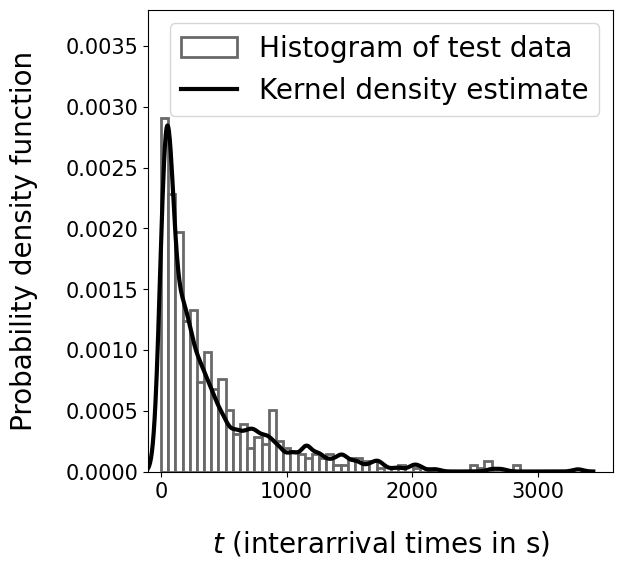

In [25]:
# Nonparametric modeling using kernel density estimation
training_months = ["January","February","March","April","May","June"]
test_months = ["July","August","September","October","November","December"]
time_ini = 6
time_end = 7

interarrival_times = [0,1000,2000,3000]

verbose = False
training_data = compute_interarrival_times(training_months,time_ini,time_end,verbose)
test_data = compute_interarrival_times(test_months,time_ini,time_end,verbose)

n_bins = 50
bw=0.3
x_min = 0
x_max = 3600
y_max = 0.0038

plt.figure(figsize=(6,6))
plt.xticks(interarrival_times,fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(test_data,bins=n_bins,color='white', edgecolor='dimgray',
          linewidth=2,density=True,label="Histogram of test data")
sns.kdeplot(training_data,bw_adjust=bw,color="black",lw=3,gridsize=1000, legend = False,label="Kernel density estimate")#,color='white', edgecolor='black',linewidth=2)
plt.xlim([x_min-100,x_max])
plt.ylim([0,y_max])
plt.legend(fontsize=font_size)
plt.xlabel('$t$ (interarrival times in s)',fontsize=font_size,labelpad=20)
plt.ylabel('Probability density function',fontsize=font_size,labelpad=20)

ML parameter estimate: 0.00251


Text(0.5, 0, '$t$ (interarrival times in s)')

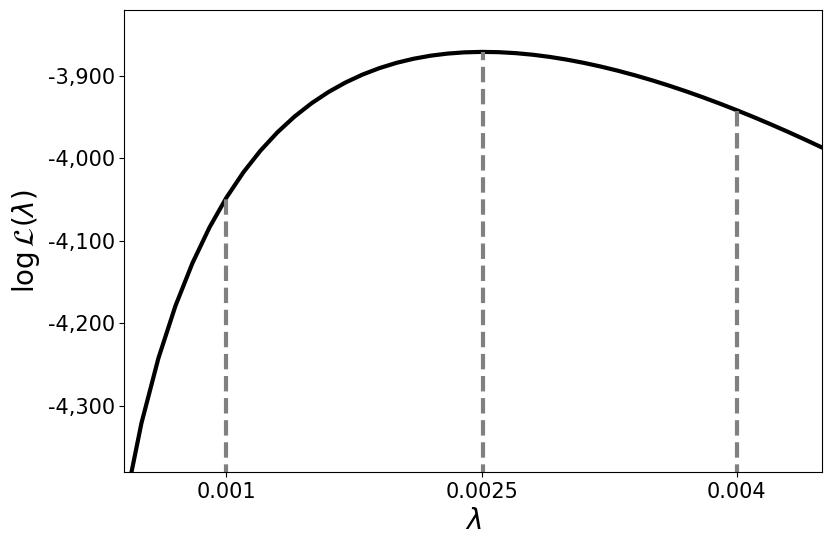

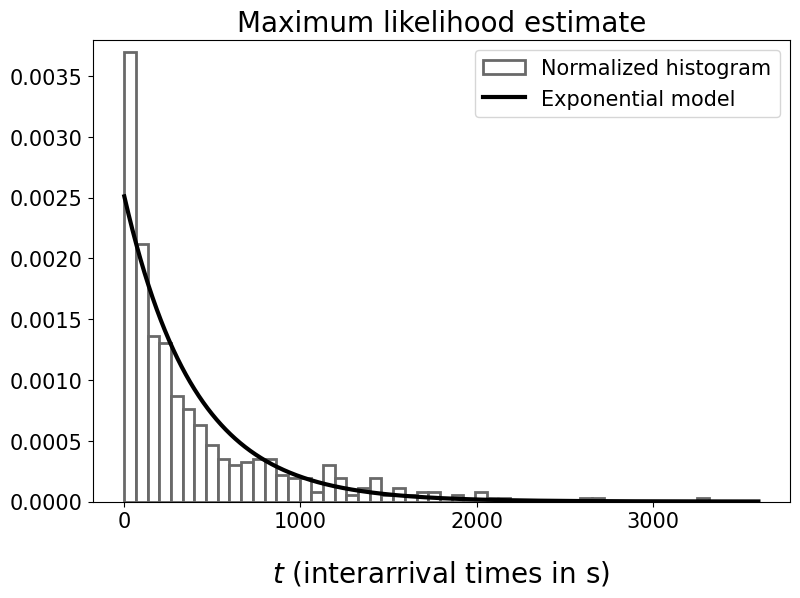

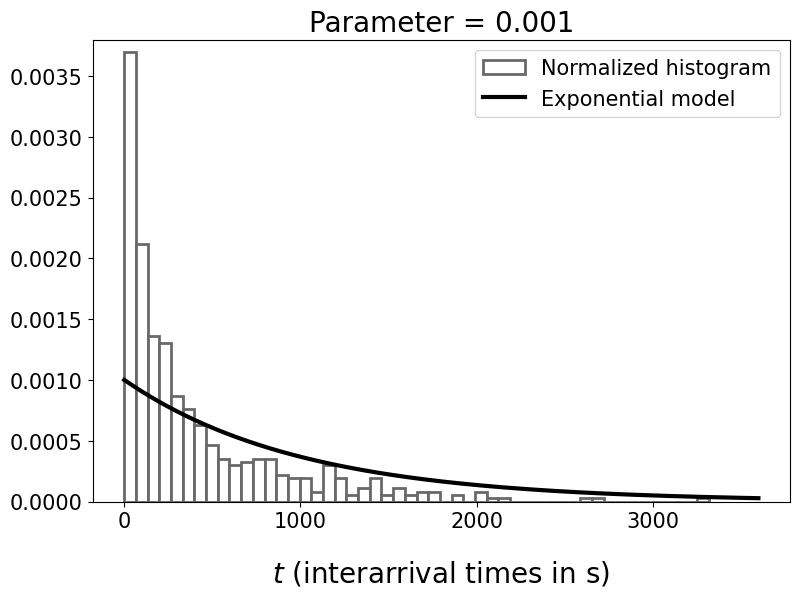

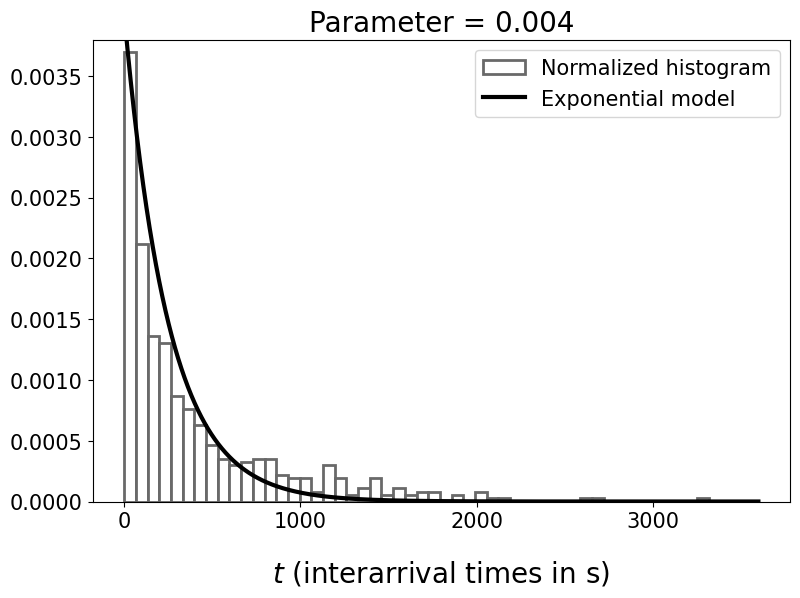

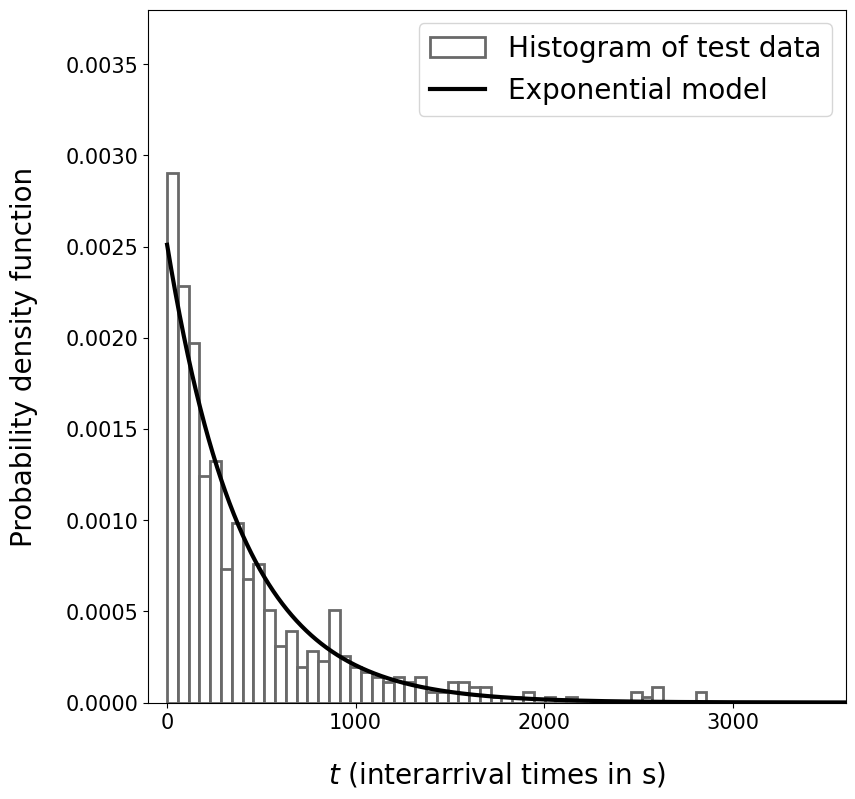

In [28]:
x_min = 0
x_max = 3600
y_max = 0.0038

# Parametric modeling using an exponential distribution
def exponential_model(param,t):
    parametric_fit = expon.pdf(t,0,1/param)
    return parametric_fit

# Log likelihood function
def log_likelihood(param,train_data):
    n = len(train_data)
    llk = n * np.log(param) - param * np.sum(train_data)
    return llk

lambda_min = 0.0004
lambda_max = 0.0045
lambda_vals = np.arange(lambda_min-1e-4,lambda_max+1e-4,1e-4)
log_likelihood_vals = log_likelihood(lambda_vals,training_data)

lambda_ML = 1/np.mean(training_data)
print("ML parameter estimate: {:0.5f}".format(lambda_ML))
other_val_1 = 0.001
other_val_2 = 0.004

step = 1
t=np.arange(x_min,x_max+step,step)

y_max_llk = -3820
y_min_llk = -4380
x_min = 0.6
plt.figure(figsize=(9,6))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(lambda_vals,log_likelihood_vals,linewidth=3,color="black")
plt.vlines(lambda_ML, np.min(log_likelihood_vals), log_likelihood(lambda_ML,training_data), color="gray", linestyles='dashed',lw=3)
plt.vlines(other_val_1, np.min(log_likelihood_vals), log_likelihood(other_val_1,training_data), color="gray", linestyles='dashed',lw=3)
plt.vlines(other_val_2, np.min(log_likelihood_vals), log_likelihood(other_val_2,training_data), color="gray", linestyles='dashed',lw=3)
plt.ylim([y_min_llk,y_max_llk])
plt.xlim([lambda_min,lambda_max])
plt.xlabel(r'$\lambda$',fontsize=font_size)
plt.ylabel(r'$\log \mathcal{L}(\lambda)$',fontsize=font_size)
plt.xticks([other_val_1,0.0025,other_val_2],labels=["0.001","0.0025","0.004"])
plt.yticks([-3900,-4000,-4100,-4200,-4300],labels=["-3,900","-4,000","-4,100","-4,200","-4,300"])

parametric_fit_max_likelihood = exponential_model(lambda_ML,t)
parametric_fit_other_1 = exponential_model(other_val_1,t)
parametric_fit_other_2 = exponential_model(other_val_2,t)

plt.figure(figsize=(9,6))
plt.xticks(interarrival_times,fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(training_data,bins=n_bins,color='white', edgecolor='dimgray',
          linewidth=2,density=True,label="Normalized histogram")
plt.plot(t,parametric_fit_max_likelihood,lw=3,color="black",
     label=r'Exponential model')
plt.ylim([0,y_max])
plt.xlabel('$t$ (interarrival times in s)',fontsize=font_size,labelpad=20)
plt.legend(fontsize=font_size_ticks)
plt.title("Maximum likelihood estimate",fontsize=font_size)

plt.figure(figsize=(9,6))
plt.xticks(interarrival_times,fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(training_data,bins=n_bins,color='white', edgecolor='dimgray',
          linewidth=2,density=True,label="Normalized histogram")
plt.plot(t,parametric_fit_other_1,lw=3,color="black",
     label=r'Exponential model')
plt.ylim([0,y_max])
plt.xlabel('$t$ (interarrival times in s)',fontsize=font_size,labelpad=20)
plt.legend(fontsize=font_size_ticks)
plt.title("Parameter = "+ str(other_val_1),fontsize=font_size)

plt.figure(figsize=(9,6))
plt.xticks(interarrival_times,fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(training_data,bins=n_bins,color='white', edgecolor='dimgray',
          linewidth=2,density=True,label="Normalized histogram")
plt.plot(t,parametric_fit_other_2,lw=3,color="black",
     label=r'Exponential model')
plt.ylim([0,y_max])
plt.xlabel('$t$ (interarrival times in s)',fontsize=font_size,labelpad=20)
plt.legend(fontsize=font_size_ticks)
plt.title("Parameter = "+ str(other_val_2),fontsize=font_size)

plt.figure(figsize=(9,9))
plt.xticks(interarrival_times,fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(test_data,bins=n_bins,color='white', edgecolor='dimgray',
          linewidth=2,density=True,label="Histogram of test data")
plt.plot(t,parametric_fit_max_likelihood,lw=3,color="black",
     label=r'Exponential model')
plt.xlim([x_min-100,x_max])
plt.ylim([0,y_max])
plt.legend(fontsize=font_size)
plt.ylabel('Probability density function',fontsize=font_size,labelpad=20)
plt.xlabel('$t$ (interarrival times in s)',fontsize=font_size,labelpad=20)


Mean of data: 30.750060081711126
Standard deviation of data: 33.606375677760354


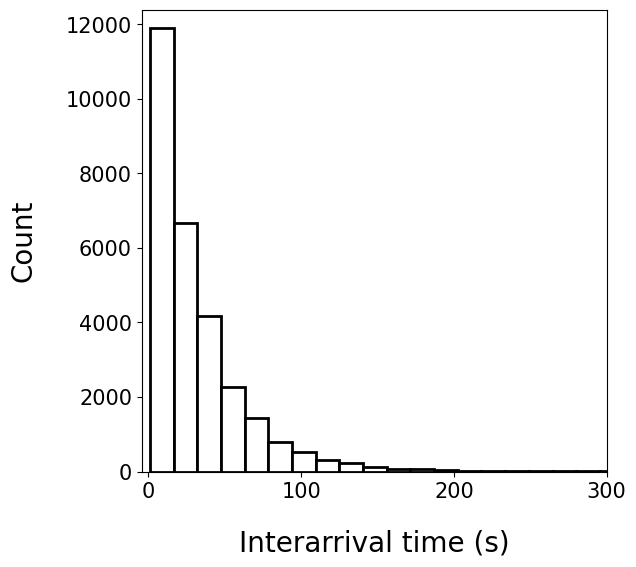

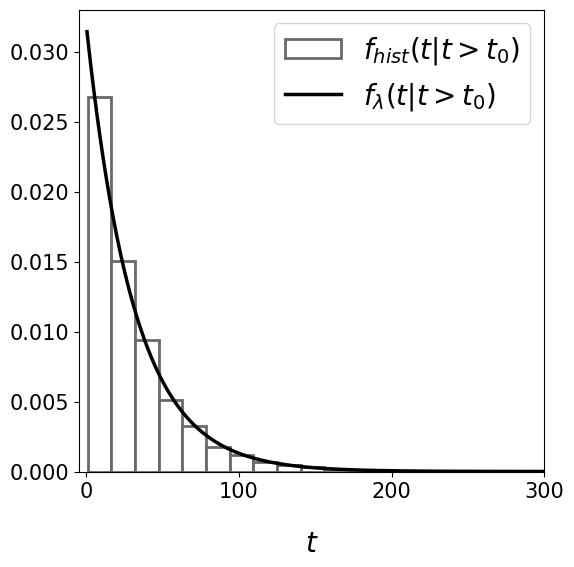

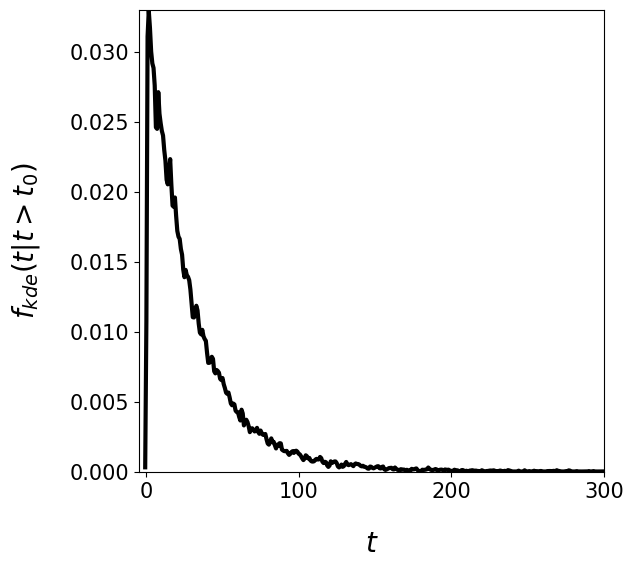

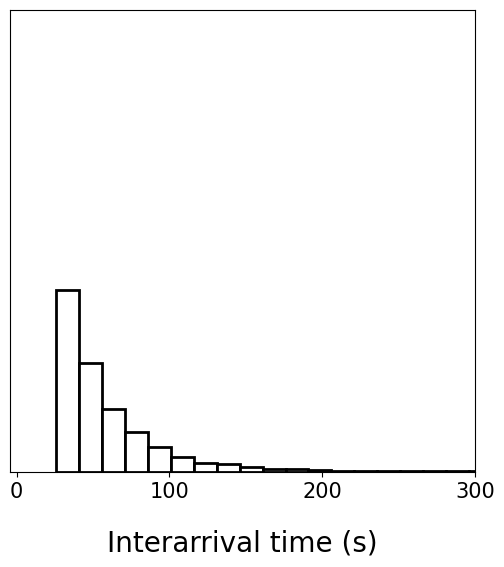

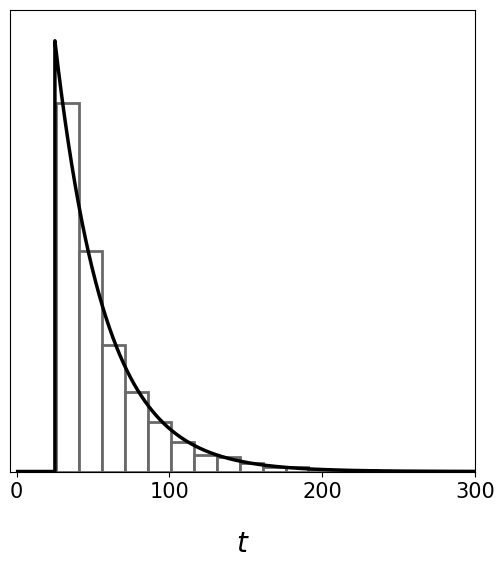

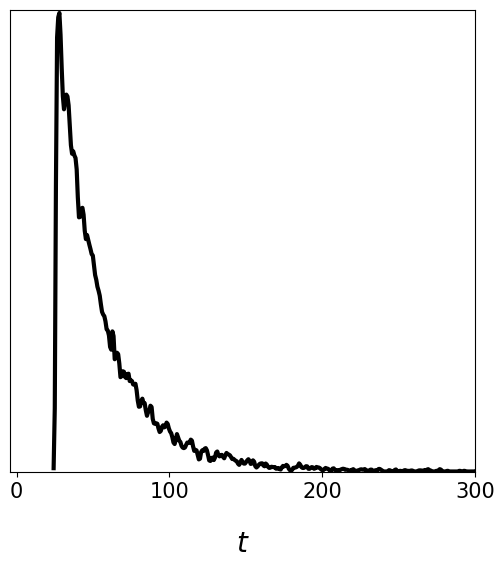

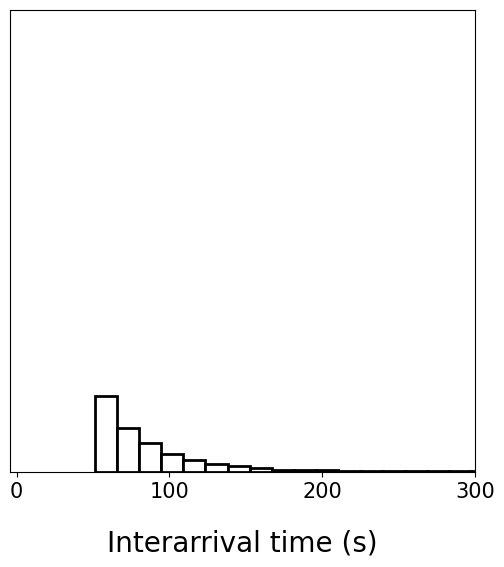

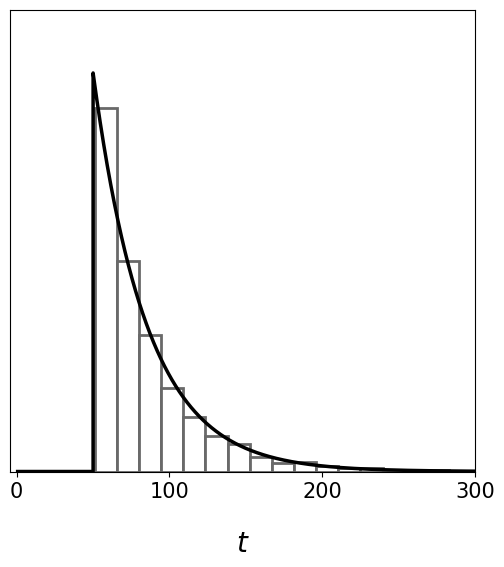

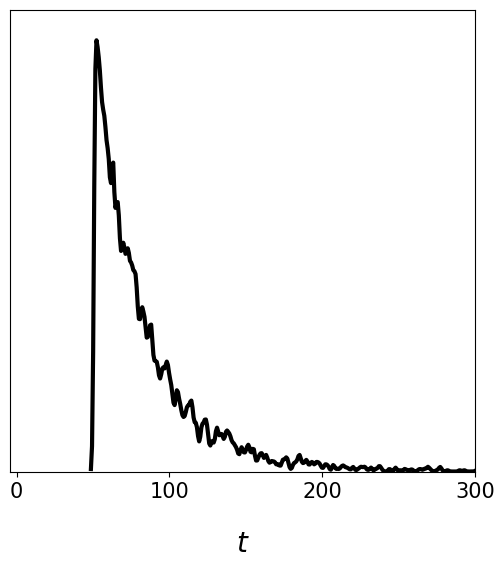

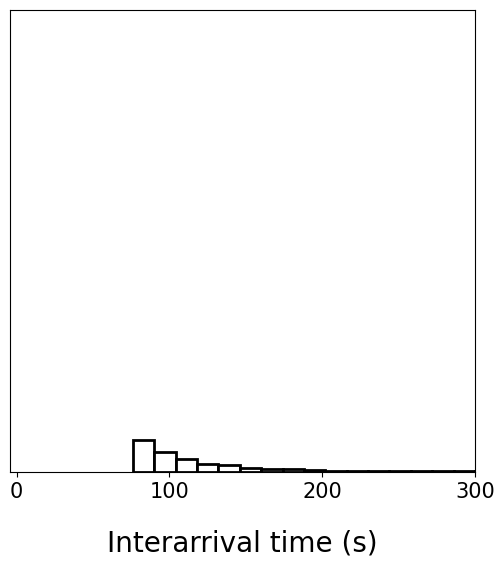

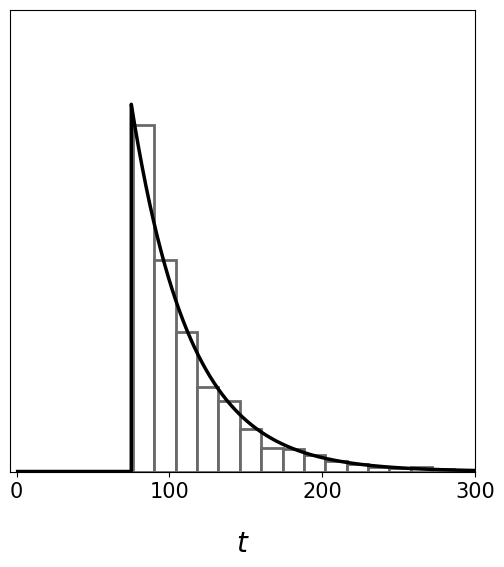

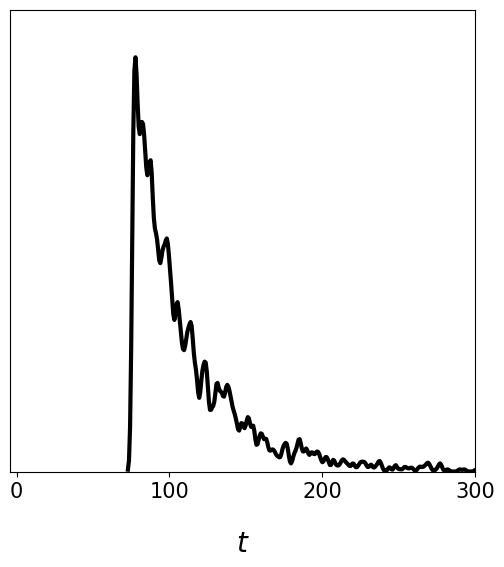

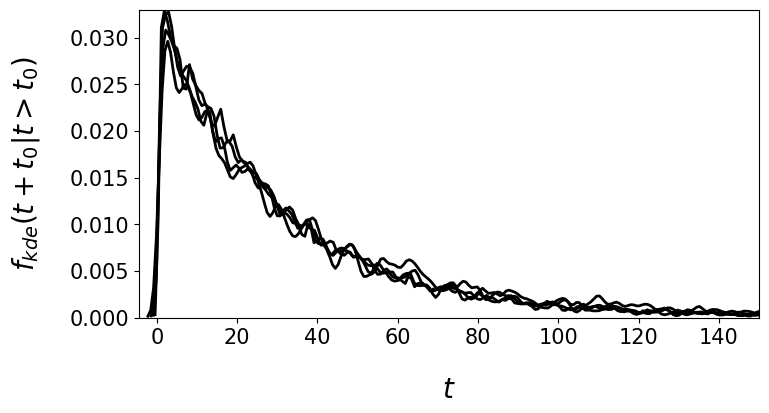

In [31]:
# Verifying memoryless property of exponential distribution in real data
all_months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
time_ini = 9
time_end = 10
data = compute_interarrival_times(all_months,time_ini,time_end,verbose)
times = [1e-5,25,50,75]

print("Mean of data: "+ str(np.mean(data)))
print("Standard deviation of data: "+ str(np.std(data)))

interarrival_times_cond = [0,100,200,300]

x_max = 300
y_max = 0.033
y_max_hist = 12400
bw=0.11
conditioned_data = []
for ind,x in enumerate(times):
    data_above_x = data[data > x]
    conditioned_data.append(data_above_x)
    lambda_ML = 1/np.mean(data_above_x-x)
    step = 0.01
    t=np.arange(x_min,x_max+step,step)
    
    plt.figure(figsize=(6,6))
    plt.xticks(interarrival_times_cond,fontsize=font_size_ticks) 
    plt.hist(data_above_x,bins=n_bins,color='white', edgecolor='black', linewidth=2,density=False,
             label=r'$f_{hist}(t | t > t_0)$')
    plt.xlim([x_min-5,x_max])
    plt.ylim([0,y_max_hist])
    if ind == 0:
        plt.yticks(fontsize=font_size_ticks)
        plt.ylabel("Count",fontsize=font_size,labelpad=20)
    else:
        plt.yticks([])
    plt.xlabel('Interarrival time (s)',fontsize=font_size,labelpad=20)
    # plt.legend(fontsize=font_size)
    
    plt.figure(figsize=(6,6))
    plt.xticks(interarrival_times_cond,interarrival_times_cond,fontsize=font_size_ticks) 
    plt.hist(data_above_x,bins=n_bins,color='white', edgecolor='dimgray', linewidth=2,density=True,
             label=r'$f_{hist}(t | t > t_0)$')
    plt.plot(t,expon.pdf(t,x,1/lambda_ML),lw=2.5,color="black",label=r'$f_{\lambda}(t | t > t_0)$')
    plt.xlim([x_min-5,x_max])
    plt.ylim([0,y_max])
    if ind == 0:
        plt.yticks(fontsize=font_size_ticks)
        plt.legend(fontsize=font_size)
    else:
        plt.yticks([])
    plt.xlabel('$t$',fontsize=font_size,labelpad=20)
    # plt.legend(fontsize=font_size)
    
    plt.figure(figsize=(6,6))
    plt.xticks(interarrival_times_cond,fontsize=font_size_ticks) 
    sns.kdeplot(data[data > x],bw_adjust=bw,color="black",lw=3,gridsize=1000, legend = False,label="x="+str(x))#,color='white', edgecolor='black',linewidth=2)
    plt.xlim([x_min-5,x_max])
    plt.ylim([0,y_max])
    if ind == 0:
        plt.yticks(fontsize=font_size_ticks)
        plt.ylabel(r"$f_{kde}(t | t > t_0)$",fontsize=font_size,labelpad=20)
    else:
        plt.yticks([])
        plt.ylabel("")
    plt.xlabel('$t$',fontsize=font_size,labelpad=20)
    # plt.legend(fontsize=font_size)
    

plt.figure(figsize=(8,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
for ind,x in enumerate(times):
    data_plot = conditioned_data[ind]-x
    sns.kdeplot(data_plot,bw_adjust=bw,color="black",lw=2,gridsize=1000, legend = False)
    plt.xlim([x_min-5,150])
    plt.ylim([0,y_max])
    plt.ylabel(r"$f_{kde}(t + t_0 | t > t_0)$",fontsize=font_size,labelpad=20)
    plt.xlabel('$t$',fontsize=font_size,labelpad=20)